### Name: Bhargavi Poyekar
### Class: BE COMPS
### Batch: C
### UID: 2018130040

### Date: 29/09/2021

## Decision Making and Business Intelligence Lab
## Experiment - 3a

To implement Business Intelligence using prediction model for a given problem.

Aim - Predict the price of used cars for any two car models and any two brands using following data:

Dataset at https://www.kaggle.com/c/1056lab-used-cars-price-prediction/data

File is "autos.csv"

Attributes

Independent Attributes -> model, brand, Avg_running_per_year = kilometer/(yearOfRegistration-current year)

Dependent Attribute -> price

M = No of cases = 50 + (RN % 43)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Roll No.
RN = 6
print("Roll No. = ",RN)

Roll No. =  6


In [ ]:
# No. of cases
M = 50 + (RN % 43)
print("\nNo. of cases: M = ",M)


No. of cases: M =  56


In [ ]:
# Reading csv file and storing it in dataframe
auto_data = pd.read_csv('/content/drive/MyDrive/DMBI/Exp3/autos-exp-3-a.csv', encoding='latin1')

In [ ]:
auto_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [ ]:
auto_data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [ ]:
auto_data['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada'], dtype=object)

In [ ]:
# auto_data[(auto_data['model']=='grand')&(auto_data['brand']=='jeep')]
# auto_data[(auto_data['model']=='golf')&(auto_data['brand']=='volkswagen')]
# auto_data[(auto_data['brand']=='volkswagen')]

### Missing Values

In [ ]:
# Removing rows with missing values
auto_data = auto_data.dropna()

In [ ]:
auto_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,2016-03-19 19:53:49,turbo_defekt,privat,Angebot,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,2016-03-19 00:00:00,0,96465,2016-03-19 20:44:43
371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


Adding column: Avg_running_per_year=kilometer/(yearOfRegistration-current year)

In [ ]:
# Storing current year
currentYear = date.today().year

# Adding column Avg_running_per_year
auto_data['Avg_running_per_year'] = auto_data['kilometer']/(currentYear - auto_data['yearOfRegistration'])

In [ ]:
auto_data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode,Avg_running_per_year
count,2.609560e+05,260956.000000,260956.000000,260956.000000,260956.000000,260956.0,260956.000000,260956.000000
mean,8.208628e+03,2003.309500,126.332366,124058.672726,6.182552,0.0,51818.711177,7402.189426
std,3.433091e+05,6.512161,145.277559,39848.176772,3.471359,0.0,25843.428111,2682.323185
min,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,45.045045
25%,1.500000e+03,1999.000000,78.000000,100000.000000,3.000000,0.0,31226.000000,5952.380952
50%,3.850000e+03,2004.000000,116.000000,150000.000000,6.000000,0.0,51103.000000,7142.857143
75%,8.600000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,72766.000000,8823.529412
max,1.000000e+08,2018.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000,50000.000000


In [ ]:
# print(set(auto_data[auto_data['brand'] == 'renault' ].model))
# print(set(auto_data.brand))
# auto_data[(auto_data['model']=='santa')&(auto_data['brand']=='nissan')]

In [ ]:
# auto_data[(auto_data['model']=='r19')&(auto_data['brand']=='renault')]

Renault R19

In [ ]:
# Filtering dataset for Brand=Renault and Model = R19
renault_r19 = auto_data[(auto_data['model']=='r19')&(auto_data['brand']=='renault')].loc[:,['Avg_running_per_year', 'price']]
renault_r19

,Avg_running_per_year,price
222,5357.142857,350
6836,4464.285714,140
11354,5769.230769,899
13166,3214.285714,4000
21686,2592.592593,600
...,...,...
333120,5000.000000,240
335813,4629.629630,200
345547,5172.413793,1300
368169,5555.555556,500


Training Set - Renault R19

In [ ]:
# Taking sample of M records for Renault-R19
renault_r19_records = renault_r19.iloc[:M]
# renault_r19_records = renault_r19.sample(n=M)
renault_r19_records

,Avg_running_per_year,price
222,5357.142857,350
6836,4464.285714,140
11354,5769.230769,899
13166,3214.285714,4000
21686,2592.592593,600
30107,3214.285714,550
38535,5555.555556,750
40922,5555.555556,200
51715,3600.000000,3290
54627,3214.285714,250


Testing Set - Renault R19

In [ ]:
renault_r19_test = renault_r19.iloc[M+1:M+21]
renault_r19_test
# renault_r19_test  = renault_r19[~renault_r19.index.isin(renault_r19_records.index)].sample(n=12)
# renault_r19_test

,Avg_running_per_year,price
292612,5769.230769,600
293895,4310.344828,750
298294,2962.962963,1100
303750,5357.142857,1050
309917,5000.000000,2700
315441,5000.000000,550
323386,5172.413793,1500
325452,5769.230769,590
333120,5000.000000,240
335813,4629.629630,200


Jeep Grand

In [ ]:
# Filtering dataset for Brand=Jeep and Model = Grand
jeep_grand = auto_data[(auto_data['model']=='grand')&(auto_data['brand']=='jeep')].loc[:,['Avg_running_per_year', 'price']]
jeep_grand

,Avg_running_per_year,price
1015,3750.000000,46950
1045,5769.230769,3200
1273,5000.000000,9000
2060,8333.333333,7800
4155,6666.666667,33800
...,...,...
363127,6000.000000,6500
365127,10714.285714,12850
365394,5357.142857,2900
365698,6818.181818,4700


Training Set - Jeep Grand

In [ ]:
# Taking sample of M records for Jeep-Grand
jeep_grand_records = jeep_grand.iloc[:M]
# jeep_grand_records = jeep_grand.sample(n=M)
jeep_grand_records

,Avg_running_per_year,price
1015,3750.000000,46950
1045,5769.230769,3200
1273,5000.000000,9000
2060,8333.333333,7800
4155,6666.666667,33800
7176,7142.857143,2300
8543,12857.142857,19999
12627,7777.777778,34500
14433,7142.857143,18300
15500,11538.461538,14900


Testing Set - Jeep Grand

In [ ]:
jeep_grand_test = jeep_grand.iloc[M+1:M+21]
jeep_grand_test
# jeep_grand_test  = jeep_grand[~jeep_grand.index.isin(jeep_grand_records.index)].sample(n=20)
# jeep_grand_test

,Avg_running_per_year,price
85075,5769.230769,2999
86284,15000.000000,18900
86403,6250.000000,3200
86659,7777.777778,35222
87190,7894.736842,3499
89992,6818.181818,5500
91429,5333.333333,21500
92275,10000.000000,9600
93147,7894.736842,3950
94480,10000.000000,8490


## Simple Linear Regression

In [ ]:
# Function for Simple Regression
def simpleRegression(df):

  # Calculating mean for x values i.e. Average Running Per Year
  mean_x = df['Avg_running_per_year'].mean()
  print("\nMean for x values i.e. Average Running Per Year = ", round(mean_x, 5))

  # Calculating mean for y values i.e. price
  mean_y = df['price'].mean()
  print("\nMean for y values i.e. price = ", round(mean_y, 5))

  #  Calculating sigma_xy
  sigma_xy = 0
  for i in df.index:
    # print((df.loc[i, 'Avg_running_per_year'] - mean_x) * (df.loc[i, 'price'] - mean_y))
    sigma_xy += (df.loc[i, 'Avg_running_per_year'] - mean_x) * (df.loc[i, 'price'] - mean_y)
  print("\nSummation((xi-mean(x))(yi-mean(y))) = ", round(sigma_xy, 5))
  
  # Calculating sigma_xx
  sigma_xx = 0
  for i in  df.index:
    sigma_xx += (df.loc[i, 'Avg_running_per_year'] - mean_x)**2
  print("\nSummation((xi-mean(x))^2) = ", round(sigma_xx,5))

  # Calculating coefficient w
  slope_w = sigma_xy/sigma_xx
  print("\nSlope i.e. w = ", round(slope_w, 5))

  # Calculating intercept b
  intercept_b = mean_y - slope_w * mean_x
  print("\nIntercept i.e. b = ", round(intercept_b, 5))

  return slope_w, intercept_b

### Regression for Renault R19

In [ ]:
w_renault_r19, b_renault_r19 = simpleRegression(renault_r19_records)
print(f"\nSimple Regression for Renault R19\n\nY = {round(w_renault_r19, 4)}X + {round(b_renault_r19, 4)}")
print(f"\nPrice = {round(w_renault_r19, 4)} * Average Running Per Year + {round(b_renault_r19, 4)}")


Mean for x values i.e. Average Running Per Year =  4656.62237

Mean for y values i.e. price =  1009.41071

Summation((xi-mean(x))(yi-mean(y))) =  -2799963.49849

Summation((xi-mean(x))^2) =  94874725.69237

Slope i.e. w =  -0.02951

Intercept i.e. b =  1146.83796

Simple Regression for Renault R19

Y = -0.0295X + 1146.838

Price = -0.0295 * Average Running Per Year + 1146.838


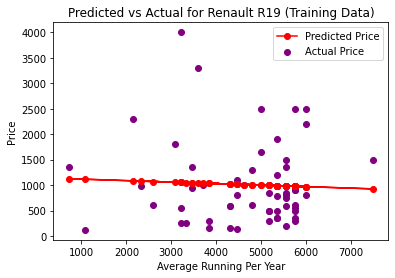

In [ ]:
# Calculating predicted values for training set
renault_r19_train_pred = []
for i in renault_r19_records.index:
  renault_r19_train_pred.append(round(w_renault_r19 * renault_r19_records.loc[i, 'Avg_running_per_year']  + b_renault_r19, 4))

# Plotting predicted vs actual for training set
plt.scatter(renault_r19_records['Avg_running_per_year'], renault_r19_records['price'], color = "purple", label="Actual Price")
plt.plot(renault_r19_records['Avg_running_per_year'], renault_r19_train_pred, marker='o', color = "red", label="Predicted Price")
plt.title("Predicted vs Actual for Renault R19 (Training Data)")
plt.xlabel("Average Running Per Year")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# Calculating predicted values for testing set
renault_r19_predictions = []
print("Renault R19\n\nPredicted Value\t\tExpected Value")
for i in renault_r19_test.index:
  renault_r19_predictions.append(round(w_renault_r19 * renault_r19_test.loc[i, 'Avg_running_per_year']  + b_renault_r19, 4))
  print(f"\n{round(w_renault_r19 * renault_r19_test.loc[i, 'Avg_running_per_year']  + b_renault_r19, 4)}\t\t{renault_r19_test.loc[i, 'price']}")

Renault R19

Predicted Value		Expected Value

976.5752		600

1019.6301		750

1059.3944		1100

988.7368		1050

999.2769		2700

999.2769		550

994.1886		1500

976.5752		590

999.2769		240

1010.2073		200

994.1886		1300

982.8812		500

1056.0311		1300


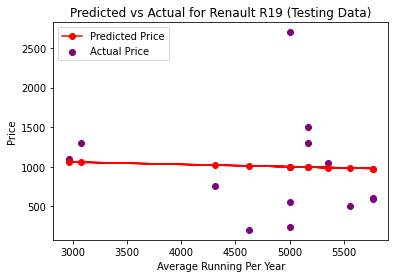

In [ ]:
# Plotting predicted vs actual for testing set
plt.scatter(renault_r19_test['Avg_running_per_year'], renault_r19_test['price'], color = "purple", label="Actual Price")
plt.plot(renault_r19_test['Avg_running_per_year'], renault_r19_predictions, marker = 'o', color = "red", label="Predicted Price")
plt.title("Predicted vs Actual for Renault R19 (Testing Data)")
plt.xlabel("Average Running Per Year")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
w_jeep_grand, b_jeep_grand = simpleRegression(jeep_grand_records)
print(f"\nSimple Regression for Jeep Grand\n\nY = {round(w_jeep_grand, 4)}X + {round(b_jeep_grand, 4)}")
print(f"\nPrice = {round(w_jeep_grand, 4)} * Average Running Per Year + {round(b_jeep_grand, 4)}")


Mean for x values i.e. Average Running Per Year =  7595.9323

Mean for y values i.e. price =  13169.19643

Summation((xi-mean(x))(yi-mean(y))) =  -100749355.989

Summation((xi-mean(x))^2) =  318069719.65893

Slope i.e. w =  -0.31675

Intercept i.e. b =  15575.22643

Simple Regression for Jeep Grand

Y = -0.3168X + 15575.2264

Price = -0.3168 * Average Running Per Year + 15575.2264


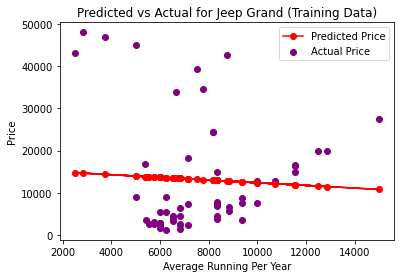

In [ ]:
# Calculating predicted values for training set
jeep_grand_train_pred = []
for i in jeep_grand_records.index:
  jeep_grand_train_pred.append(round(w_jeep_grand * jeep_grand_records.loc[i, 'Avg_running_per_year']  + b_jeep_grand, 4))

# Plotting prediced vs actual for training set
plt.scatter(jeep_grand_records['Avg_running_per_year'], jeep_grand_records['price'], color = "purple", label="Actual Price")
plt.plot(jeep_grand_records['Avg_running_per_year'], jeep_grand_train_pred, marker='o', color = "red", label="Predicted Price")
plt.title("Predicted vs Actual for Jeep Grand (Training Data)")
plt.xlabel("Average Running Per Year")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# Calculating predicted values for testing set
jeep_grand_predictions = []
print("Jeep Grand\n\nPredicted Value\t\tExpected Value")
for i in jeep_grand_test.index:
  jeep_grand_predictions.append(round(w_jeep_grand * jeep_grand_test.loc[i, 'Avg_running_per_year']  + b_jeep_grand, 4))
  print(f"\n{round(w_jeep_grand * jeep_grand_test.loc[i, 'Avg_running_per_year']  + b_jeep_grand, 4)}\t\t{jeep_grand_test.loc[i, 'price']}")

Jeep Grand

Predicted Value		Expected Value

13747.8086		2999

10823.94		18900

13595.5238		3200

13111.5964		35222

13074.5494		3499

13415.5508		5500

13885.8801		21500

12407.7021		9600

13074.5494		3950

12407.7021		8490

12935.6229		6990

13312.7091		1800

12605.6724		9900

13815.4907		2000

12605.6724		10800

12407.7021		12490

13595.5238		8500

12605.6724		11000

13595.5238		2300

13775.4967		3540


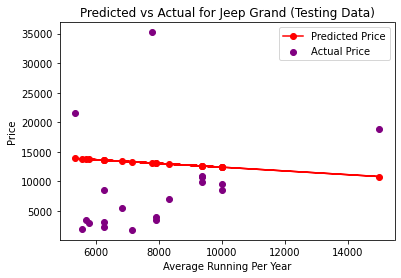

In [ ]:
# Plotting predicted vs actual for testing set
plt.scatter(jeep_grand_test['Avg_running_per_year'], jeep_grand_test['price'], color = "purple", label='Actual Price')
plt.plot(jeep_grand_test['Avg_running_per_year'], jeep_grand_predictions, marker='o', color = "red", label='Predicted Price')
plt.title("Predicted vs Actual for Jeep Grand (Testing Data)")
plt.xlabel("Average Running Per Year")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
flag = 1
while flag:
  print("\nSelect Brand and Model for Price Prediction\n1. Renault R19\n2. Jeep Grand\n3. Exit")
  choice = int(input("\nEnter your choice = "))
  if choice == 3:
    # Exit option
    flag = 0
  
  elif choice == 1:
    # Renault R19
    avg_running_per_year = float(input("\nEnter the average running per year: "))
    print(f"\nPrice = {round(w_renault_r19 * avg_running_per_year + b_renault_r19,4)}")
  
  elif choice == 2:
    # Jeep Grand
    avg_running_per_year = float(input("\nEnter the average running per year: "))
    print(f"\nPrice = {round(w_jeep_grand * avg_running_per_year + b_jeep_grand, 4)}")
  
  else:
    # Invalid Choice1
    print("\nInvalid Choice !")


Select Brand and Model for Price Prediction
1. Renault R19
2. Jeep Grand
3. Exit

Enter your choice = 1

Enter the average running per year: 5000

Price = 999.2769

Select Brand and Model for Price Prediction
1. Renault R19
2. Jeep Grand
3. Exit

Enter your choice = 1

Enter the average running per year: 10000

Price = 851.7158

Select Brand and Model for Price Prediction
1. Renault R19
2. Jeep Grand
3. Exit

Enter your choice = 2

Enter the average running per year: 5000

Price = 13991.4643

Select Brand and Model for Price Prediction
1. Renault R19
2. Jeep Grand
3. Exit

Enter your choice = 2

Enter the average running per year: 10000

Price = 12407.7021

Select Brand and Model for Price Prediction
1. Renault R19
2. Jeep Grand
3. Exit

Enter your choice = 3
